<a href="https://colab.research.google.com/github/aditya-saurabh/auto-encoders/blob/master/auto_encoders_denoising_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing libraries
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [31]:
# importing dataset -- fashion mnist
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

# printing the shape of data
print(f'The shape of input image tensor is {train_x.shape}, and that of its label is {train_y.shape}')

The shape of input image tensor is (60000, 28, 28), and that of its label is (60000,)


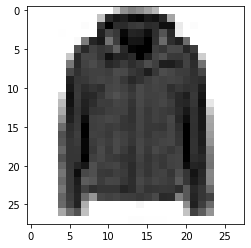

In [32]:
# The input image is (28,28) pixel
# Plotting one of the input image randomly
random = np.random.randint(0, train_x.shape[0]+1)

plt.imshow(train_x[random], cmap='gray_r')
plt.show()

In [0]:
# preprocessing the data
# converting data 
train_x = train_x/255.0
test_x = test_x/255.0

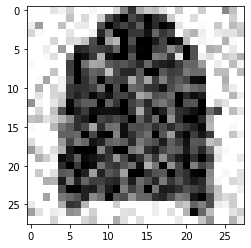

In [34]:
#adding some noise 
noise_factor = 0.2
noise_dataset = []

for image in train_x:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

plt.imshow(noise_dataset[random], cmap='gray_r')
plt.show()

# adding some noise to the test data

noise_dataset_test = []

for image in test_x:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset_test.append(noisy_image)

noise_dataset = np.expand_dims(noise_dataset, -1)
noise_dataset_test = np.expand_dims(noise_dataset_test, -1)

In [39]:
# Building and training an autoencoder
autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Reshape((7,7,1)),

    tf.keras.layers.Conv2DTranspose(32, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(1,1), padding='same', activation='sigmoid'),

])

print(autoencoder.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1028)              1612932   
_________________________________________________________________
dense_7 (Dense)              (None, 49)                50421     
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 1)          

In [0]:
# defining the optimizer
opt = tf.keras.optimizers.Adam(lr = 0.001)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [41]:
# fitting the data

epochs = 20
batch_size = 400

history = autoencoder.fit(noise_dataset, train_x, validation_data=(noise_dataset_test, test_x), epochs=epochs, batch_size= batch_size)

Epoch 1/20
150/150 [==============================] - 10s 69ms/step - loss: 0.4393 - val_loss: 0.3436
Epoch 2/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3297 - val_loss: 0.3241
Epoch 3/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3178 - val_loss: 0.3141
Epoch 4/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3117 - val_loss: 0.3103
Epoch 5/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3091 - val_loss: 0.3095
Epoch 6/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3058 - val_loss: 0.3061
Epoch 7/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3053 - val_loss: 0.3081
Epoch 8/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3025 - val_loss: 0.3029
Epoch 9/20
150/150 [==============================] - 10s 68ms/step - loss: 0.3021 - val_loss: 0.3021
Epoch 10/20
150/150 [==============================] - 10s 68ms/step - loss: 0.300

Text(0.5, 1.0, 'training loss')

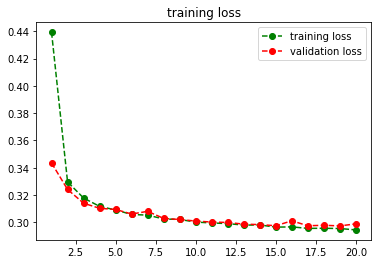

In [42]:
#----------------------------------------------
# Plotting losses
#-----------------------------------------------

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(loss)) + 1

plt.plot(epochs, loss, 'go--', label='training loss')
plt.plot(epochs, val_loss, 'ro--', label='validation loss')
plt.legend()
plt.title('training loss')

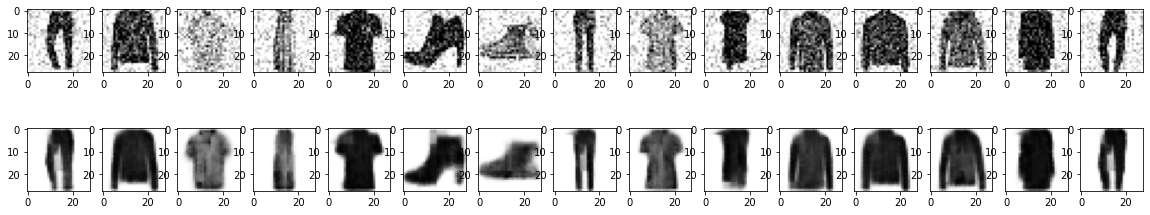

In [43]:
# checking how our network works on test data
# plotting results

grid = 15

fig = plt.figure(figsize=(20,4))

for i in range(grid):
  random = np.random.randint(0, test_x.shape[0])
  predict = autoencoder.predict(noise_dataset_test[random:random+1])
  predict = np.reshape(predict, (28,28))

  plt.subplot(2, grid, i+1)
  plt.imshow(np.reshape(noise_dataset_test[random:random+1], (28,28)), cmap='gray_r')

  plt.subplot(2, grid, i+grid+1)
  plt.imshow(predict, cmap='gray_r')

plt.show()
